In [1]:
import pickle
import numpy as np

In [2]:
with open('train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [4]:
type(test_data)

list

In [5]:
type(train_data)

list

In [6]:
len(train_data)

10000

In [7]:
len(test_data)

1000

In [9]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [10]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [11]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [12]:
train_data[0][2]

'no'

In [13]:
all_data = test_data + train_data

In [14]:
len(all_data)

11000

In [15]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [16]:
vocab = set()

for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [17]:
vocab.add('no')

In [18]:
vocab.add('yes')

In [19]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [20]:
vocab_len = len(vocab) + 1

In [22]:
vocab_len

38

In [23]:
# LONGEST STORY
all_story_lens = [len(data[0]) for data in all_data]

In [25]:
max_story_len = max(all_story_lens)

In [26]:
max_question_len = max([len(data[1]) for data in all_data])

In [27]:
max_question_len

6

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

C:\Users\SSAFY\anaconda3\envs\nlp_course\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SSAFY\anaconda3\envs\nlp_course\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SSAFY\anaconda3\envs\nlp_course\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SSAFY\anaconda3\envs\nlp_course\lib\site-packages

In [31]:
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)

In [32]:
tokenizer.word_index

{'?': 1,
 'grabbed': 2,
 'picked': 3,
 'sandra': 4,
 'to': 5,
 'put': 6,
 'moved': 7,
 'bathroom': 8,
 'apple': 9,
 'dropped': 10,
 'mary': 11,
 'in': 12,
 'discarded': 13,
 '.': 14,
 'hallway': 15,
 'got': 16,
 'there': 17,
 'milk': 18,
 'the': 19,
 'back': 20,
 'john': 21,
 'football': 22,
 'is': 23,
 'office': 24,
 'yes': 25,
 'went': 26,
 'up': 27,
 'bedroom': 28,
 'travelled': 29,
 'garden': 30,
 'down': 31,
 'took': 32,
 'journeyed': 33,
 'kitchen': 34,
 'daniel': 35,
 'left': 36,
 'no': 37}

In [33]:
train_story_text = []
train_question_text = []
train_answers = []

In [35]:
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [36]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [37]:
len(train_story_seq)

10001

In [38]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',


In [116]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [43]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [44]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [46]:
inputs_test

array([[ 0,  0,  0, ..., 19, 28, 14],
       [ 0,  0,  0, ..., 19, 30, 14],
       [ 0,  0,  0, ..., 19, 30, 14],
       ...,
       [ 0,  0,  0, ..., 19,  9, 14],
       [ 0,  0,  0, ..., 19, 30, 14],
       [ 0,  0,  0, ...,  9, 17, 14]])

In [47]:
answers_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
tokenizer.word_index['yes']

25

In [49]:
tokenizer.word_index['no']

37

In [50]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 503.])

In [52]:
from tensorflow.keras.models import Sequential, Model

In [58]:
from tensorflow.keras.layers import Embedding

In [60]:
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate

In [62]:
input_sequence = Input((max_story_len, ))
question = Input((max_question_len,))

In [63]:
vocab_size = len(vocab) + 1

In [74]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [75]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [76]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [77]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [78]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [79]:
response = add([match, input_encoded_c])
response = Permute((2, 1))(response)

In [80]:
answer = concatenate([response, question_encoded])

In [81]:
answer

<tf.Tensor 'concatenate/concat:0' shape=(?, 6, 220) dtype=float32>

In [84]:
from tensorflow.keras.layers import LSTM
answer = LSTM(32)(answer)

In [86]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [87]:
answer = Activation('softmax')(answer)

In [88]:
model = Model([input_sequence, question], answer)

In [90]:
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [92]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_6 (Sequential)       multiple             2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_8 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
__________________________________________________________________________________________________
dot_2 (Dot

In [93]:
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Train on 10000 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/120
10000/10000 [==============================] - 3s 280us/sample - loss: 0.9495 - acc: 0.4955 - val_loss: 0.7033 - val_acc: 0.5030
Epoch 2/120
10000/10000 [==============================] - 2s 213us/sample - loss: 0.7103 - acc: 0.4976 - val_loss: 0.6945 - val_acc: 0.4970
Epoch 3/120
10000/10000 [==============================] - 2s 216us/sample - loss: 0.6976 - acc: 0.5006 - val_loss: 0.6933 - val_acc: 0.4980
Epoch 4/120
10000/10000 [==============================] - 2s 217us/sample - loss: 0.6963 - acc: 0.5000 - val_loss: 0.6934 - val_acc: 0.4970
Epoch 5/120
10000/10000 [==============================] - 2s 213us/sample - loss: 0.6949 - acc: 0.5074 - val_loss: 0.6941 - val_acc: 0.4970
Epoch 6/120
10000/10000 [==============================] - 2s 213us/sample - loss: 0.6949 - acc: 0.4981 - val_loss: 0.69

10000/10000 [==============================] - 2s 240us/sample - loss: 0.3364 - acc: 0.8587 - val_loss: 0.3424 - val_acc: 0.8380
Epoch 55/120
10000/10000 [==============================] - 2s 238us/sample - loss: 0.3274 - acc: 0.8594 - val_loss: 0.3479 - val_acc: 0.8300
Epoch 56/120
10000/10000 [==============================] - 2s 239us/sample - loss: 0.3306 - acc: 0.8586 - val_loss: 0.3573 - val_acc: 0.8330
Epoch 57/120
10000/10000 [==============================] - 2s 240us/sample - loss: 0.3241 - acc: 0.8631 - val_loss: 0.3379 - val_acc: 0.8390
Epoch 58/120
10000/10000 [==============================] - 2s 228us/sample - loss: 0.3356 - acc: 0.8565 - val_loss: 0.3625 - val_acc: 0.8290
Epoch 59/120
10000/10000 [==============================] - 2s 232us/sample - loss: 0.3284 - acc: 0.8619 - val_loss: 0.3402 - val_acc: 0.8370
Epoch 60/120
10000/10000 [==============================] - 2s 237us/sample - loss: 0.3184 - acc: 0.8632 - val_loss: 0.3658 - val_acc: 0.8390
Epoch 61/120
10000/

Epoch 112/120
10000/10000 [==============================] - 2s 240us/sample - loss: 0.2921 - acc: 0.8815 - val_loss: 0.3757 - val_acc: 0.8320
Epoch 113/120
10000/10000 [==============================] - 2s 227us/sample - loss: 0.2923 - acc: 0.8811 - val_loss: 0.3621 - val_acc: 0.8360
Epoch 114/120
10000/10000 [==============================] - 2s 229us/sample - loss: 0.2912 - acc: 0.8829 - val_loss: 0.3702 - val_acc: 0.8330
Epoch 115/120
10000/10000 [==============================] - 2s 239us/sample - loss: 0.2948 - acc: 0.8789 - val_loss: 0.3651 - val_acc: 0.8300
Epoch 116/120
10000/10000 [==============================] - 2s 225us/sample - loss: 0.2818 - acc: 0.8788 - val_loss: 0.3730 - val_acc: 0.8310
Epoch 117/120
10000/10000 [==============================] - 2s 227us/sample - loss: 0.2932 - acc: 0.8785 - val_loss: 0.3962 - val_acc: 0.8220
Epoch 118/120
10000/10000 [==============================] - 2s 225us/sample - loss: 0.3046 - acc: 0.8757 - val_loss: 0.3672 - val_acc: 0.8340

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


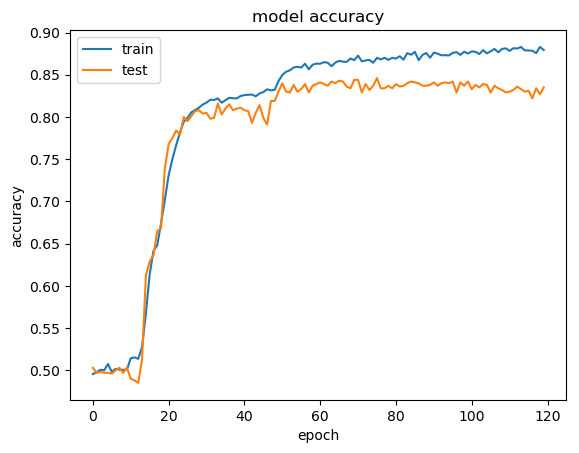

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [95]:
model.save('mybrandnewmodel.h5')

In [99]:
pred_results = model.predict(([inputs_test, queries_test]))

In [100]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [103]:
pred_results[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 2.0201907e-05, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 9.9997985e-01], dtype=float32)

In [104]:
val_max = np.argmax(pred_results[0])

In [105]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [106]:
k

'no'

In [107]:
pred_results[0][val_max]

0.99997985

In [108]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [109]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [110]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [111]:
my_question = "Is the football in the garden ?"

In [112]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [119]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [114]:
mydata

(['John',
  'left',
  'the',
  'kitchen',
  '.',
  'Sandra',
  'dropped',
  'the',
  'football',
  'in',
  'the',
  'garden',
  '.'],
 ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
 'yes')

In [120]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [121]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [122]:
pred_results = model.predict(([ my_story, my_ques]))

In [123]:
val_max = np.argmax(pred_results[0])

In [124]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [125]:
k

'no'

In [126]:
print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.99977714
